In [1]:
import tensorflow as tf
import numpy as np
import fakearray as fa
from showit import image
import matplotlib.pyplot as plt
%matplotlib inline

0.0


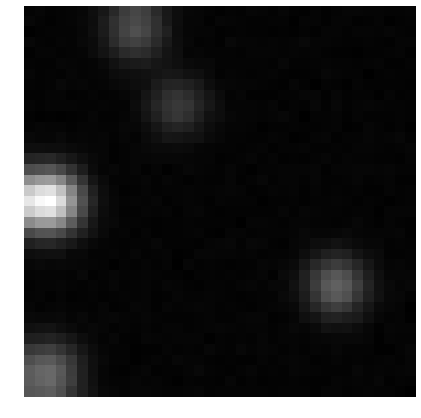

In [268]:
data,series,truth=fa.calcium_imaging(shape=(37,37),sd=2,n=5,withparams=True)
print(data.min())
data=np.expand_dims(data,0)
data=np.transpose(data,[0,2,3,1])
image(data[0].mean(axis=2))

trutharray=np.zeros((data.shape[1],data.shape[2]))

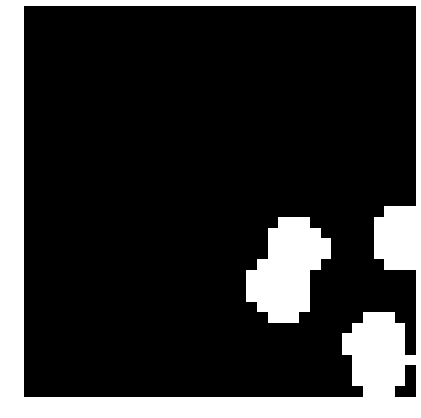

In [240]:
for neuron in truth:
        for coordinate in neuron:
            trutharray[coordinate[0],coordinate[1]]=1
image(trutharray)

#np.append(trutharray,np.zeros((1,data.shape[3])),axis=0)

In [135]:
flipped=[[np.flipud(data[i,j,:,:]) for i in j ]for j in data]
image(flipped[0].mean(axis=0))

IndexError: arrays used as indices must be of integer (or boolean) type

In [104]:
np.zeros((data.shape[3])).shape

(37,)

In [56]:
mean=data.mean(0).astype('float16')


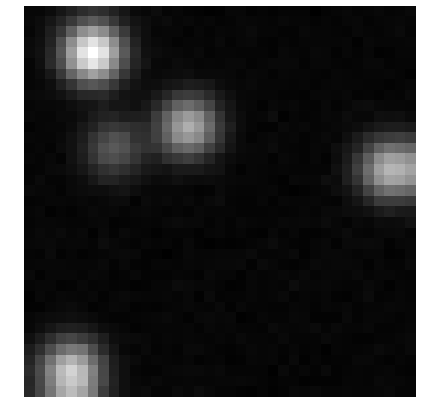

In [57]:
image(mean)


In [15]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [64]:
x = tf.placeholder(tf.float16, shape=[None, data.shape[0], data.shape[1], 1])#change this last number when adding channels
y_ = tf.placeholder(tf.float16, shape=[None, data.shape[0], data.shape[1], 2])

In [72]:
Nh1=24
W1=tf.Variable(tf.truncated_normal((5,5,1,Nh1),dtype=tf.float16))
b1=tf.Variable(tf.constant(0.1,shape=(Nh1,),dtype=tf.float16))
h1=tf.nn.conv2d(x,W1,[1,1,1,1],'SAME')


In [67]:
n1=data.shape[0]*data.shape[1]*Nh1
n2=data.shape[0]*data.shape[1]*2
h1_flat = tf.reshape(h1, (-1, n1))
W2 = tf.Variable(tf.truncated_normal((n1, n2), dtype=tf.float16))
b2 = tf.Variable(tf.constant(0.1, shape=(2, ), dtype=tf.float16))
yhat = tf.matmul(h1_flat, W2)
yhat = tf.reshape(yhat, (-1, shape[0], shape[1], 2)) + b2

In [68]:
exp = tf.exp(yhat)
exp_sum = tf.expand_dims(tf.reduce_sum(exp, reduction_indices=3), 3)
phat = tf.div(exp, exp_sum)

In [71]:
ce = -tf.log(tf.reduce_sum(tf.mul(y_, phat), reduction_indices=3))
c = tf.reduce_mean(ce)

TypeError: DataType bool for attr 'T' not in list of allowed values: float16, float32, float64, uint8, int8, int16, int32, int64, complex64, complex128

In [236]:
 def chopImage(toChop):
        
        """
        chop image into pieces of size outDims

        Parameters
        ----------

        toChop :  numpy array 
            [1,x,y,channels]

        Returns
        -------

        toReturn : numpy array
            [yIters*xIters,outDims, outDims, channels]

        """
        toReturn=np.zeros((xIters*yIters,outDims,outDims,toChop.shape[2]))
        for i in range(0,xIters):
            for j in range(0,yIters):
                toReturn[i*yIters+j,:,:,:]=toChop[i:(i+outDims), j:(j+outDims),:]
        return toReturn

In [259]:
outDims=5
upDown=1
rotate=0

truthArray=np.zeros((data.shape[0],data.shape[1],data.shape[2],1))
for d,dataset in enumerate([truth]):
    for neuron in dataset:
        for coordinate in neuron:
            truthArray[d,coordinate[0],coordinate[1],0]=1
    
xIters=data.shape[1]+1-outDims
yIters=data.shape[2]+1-outDims

#set size of returned arrays
outData=np.zeros(((upDown*2+rotate*4)*xIters*yIters,outDims,outDims,data.shape[3]))
outTruth=np.zeros(((upDown*2+rotate*4)*xIters*yIters,outDims,outDims,1))
    
for dataset in range(0,len(data)):
    outData[dataset*xIters*yIters:(dataset+1)*xIters*yIters, :, :, :]=chopImage(data[dataset, :, :, :])
    outTruth[dataset*xIters*yIters:(dataset+1)*xIters*yIters, :, :, :]=chopImage(truthArray[dataset, :, :,:])

In [258]:
truthArray[dataset, :, :, :].shape


(37, 37, 1)

2.7946247074218857

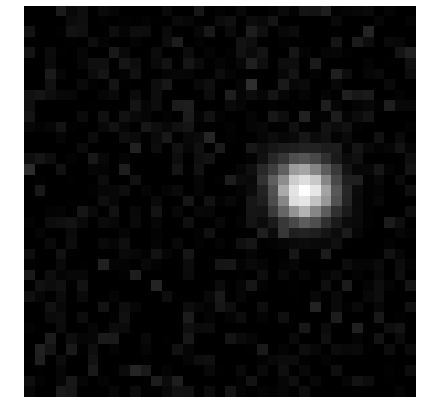

In [171]:
image(data[0,0,:,:])